tgb - 11/1/2019 - Making figures for the UW+UCI paper from reduced pkl data

In [16]:
import math

import matplotlib as mpl
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pylab import *

import numpy as np

import pickle

import xarray as xr

# Load uwnet utilities (assumes a local symlink to uwnet utilities)
from uwnet.wave import *
from uwnet.spectra import *
from uwnet.plots.jacobian import plot

IMPORTANT: Define path to .pkl data and to where .pdf figures are saved below:

In [2]:
pathPKL = '/home1/05823/tg851228/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/PKL_DATA/'
pathPDF = '/home1/05823/tg851228/'

# Figure 2

## Load data

In [3]:
NNname = 'STAB'
path = pathPKL+'9_30_Fig2_'+NNname+'.pkl'
hf = open(path,'rb')
S = pickle.load(hf)

## Plot figure

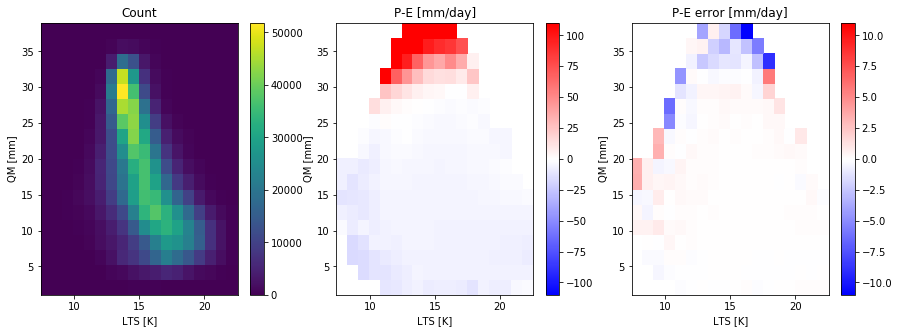

In [4]:
X = 0.5*(S['LTSspace'][:-1]+S['LTSspace'][1:])
Y = 0.5*(S['QMspace'][:-1]+S['QMspace'][1:])

option_array = ['Weights','Precip','Pano']

fig, ax = plt.subplots(1,3,figsize=(15,5))

for i,option in enumerate(option_array):
    
    if option=='Weights': C = S['Whist']; vlim=False; tit='Count'; cmaps = 'viridis'
    elif option=='Precip': C = S['PREChist'][NNname]; vlim=True; vmin = -110; vmax = 110; cmaps = 'bwr'; tit='P-E [mm/day]'
    elif option=='Heating': C = S['HEAThist'][NNname]; vlim=True; vmin = -3.5e3; vmax = 3.5e3; cmaps = 'bwr'; tit='Net heating [W/m2]'
    elif option=='Pano': C = S['PREChist'][NNname]-S['PREChist']['truth']; vlim=True; vmin = -11; vmax = 11; cmaps = 'bwr'; tit='P-E error [mm/day]'
    elif option=='Hano': C = S['HEAThist'][NNname]-S['HEAThist']['truth']; vlim=True; vmin = -70; vmax = 70; cmaps = 'bwr'; tit='Heating error [mm/day]'

    ax0 = ax[i]
    if vlim: im = ax0.pcolormesh(X, Y, C, vmin=vmin, vmax=vmax, cmap=cmaps)
    else: im = ax0.pcolormesh(X, Y, C, cmap=cmaps)

    plt.colorbar(im, ax=ax0)
    ax0.set_xlabel('LTS [K]')
    ax0.set_ylabel('QM [mm]')
    ax0.set_title(tit)
    
plt.savefig(pathPDF+'Figure2.pdf',format='pdf')

# Figure 3

## Load data for both Figure 3 and Figure 4

In [5]:
NNname = 'STAB'
path = pathPKL+'9_30_Fig3_'+NNname+'.pkl'
hf = open(path,'rb')
S34 = pickle.load(hf)

## Load data for coordinates

In [6]:
path = pathPKL+'11_2_SPCAM_coordinates.pkl'
hf = open(path,'rb')
Scoor = pickle.load(hf)

## Plot Figure

TypeError: You must first set_array for mappable

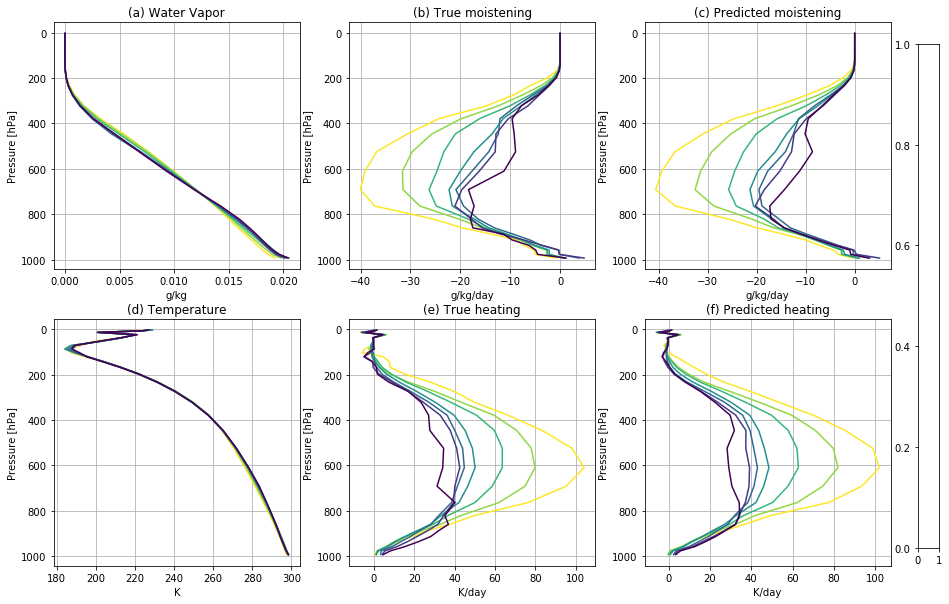

In [7]:
iQM = 16 # Choose fixed mid-tropospheric moisture value

fig, ax = plt.subplots(2,3,figsize=(15,10))

title_array = ['(a) Water Vapor','(b) True moistening','(c) Predicted moistening','(d) Temperature','(e) True heating','(f) Predicted heating']
xlab_array = ['g/kg','g/kg/day','g/kg/day','K','K/day','K/day']

# Determine range of lower-tropospheric stabilities for which count>0
n = 0
for iLTS,edgeLTS in enumerate(S['LTSspace']):
        if iLTS*S['Whist'][iQM,iLTS-1]>0: 
            if n==0: iLTSmin = iLTS
            n+=1
            iLTSmax = iLTS
            
colors = pl.cm.viridis(np.linspace(0,1,n))
colors = colors[::-1,:] # Flip color palette to have moist in blue like Noah

for i,tit in enumerate(title_array):
    ax0 = ax[math.floor(i/3),i%3]
    
    if i==0: toplt = S34['QVhist']
    elif i==1: toplt = 1e3*24*3600*S34['dqdthist']['truth']
    elif i==2: toplt = 1e3*24*3600*S34['dqdthist'][NNname]
    elif i==3: toplt = S34['Thist'] # Replace with Thist ASAP
    elif i==4: toplt = 24*3600*S34['dTdthist']['truth']
    elif i==5: toplt = 24*3600*S34['dTdthist'][NNname]
    
    ncol = 0
    for iLTS,edgeLTS in enumerate(S['LTSspace']):
        if iLTS*S['Whist'][iQM,iLTS-1]>0: 
            ncol+=1
            ax0.plot(toplt[iQM,iLTS-1,:],Scoor['lev'],color=colors[ncol-1])
    
    ax0.set_xlabel(xlab_array[i])
    ax0.set_ylabel('Pressure [hPa]')
    ax0.set_title(tit)
    ax0.invert_yaxis()
    ax0.grid()
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.925, 0.15, 0.02, 0.7])
clb = fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=S['LTSspace'][iLTSmin],
                                                                      vmax=S['LTSspace'][iLTSmax],
                                                                      clip=False),
                                     cmap= ListedColormap(colors)),cax=cbar_ax)
clb.ax.set_title('LTS [K]')

gcf().suptitle("Mid-tropospheric humidity bin: "+"%02.1f"%(0.5*(S['QMspace'][iQM]+S['QMspace'][iQM+1]))+"mm", fontsize=14)
plt.savefig(pathPDF+'Figure3.pdf',format='pdf')

# Figure 4

## Plot figure

In [ ]:
iLTS = 5 # Choose fixed lower-tropospheric stability

fig, ax = plt.subplots(2,3,figsize=(15,10))

title_array = ['(a) Water Vapor','(b) True moistening','(c) Predicted moistening','(d) Temperature','(e) True heating','(f) Predicted heating']
xlab_array = ['g/kg','g/kg/day','g/kg/day','K','K/day','K/day']

# Determine range of mid-tropospheric moistures for which count>0
n = 0
for iQM,edgeQM in enumerate(S['QMspace']):
        if iQM*S['Whist'][iQM-1,iLTS]>0: 
            if n==0: iQMmin = iQM
            n+=1
            iQMmax = iQM
colors = pl.cm.Blues(np.linspace(0,1,n))

for i,tit in enumerate(title_array):
    ax0 = ax[math.floor(i/3),i%3]
    
    if i==0: toplt = S34['QVhist']
    elif i==1: toplt = 1e3*24*3600*S34['dqdthist']['truth']
    elif i==2: toplt = 1e3*24*3600*S34['dqdthist'][NNname]
    elif i==3: toplt = S34['Thist'] # Replace with Thist ASAP
    elif i==4: toplt = 24*3600*S34['dTdthist']['truth']
    elif i==5: toplt = 24*3600*S34['dTdthist'][NNname]
    
    for iQM,edgeQM in enumerate(S['QMspace']):
        if iQM*S['Whist'][iQM-1,iLTS]>0:
            ax0.plot(toplt[iQM-1,iLTS,:],Scoor['lev'],color=colors[iQM-1])
    
    ax0.set_xlabel(xlab_array[i])
    ax0.set_ylabel('Pressure [hPa]')
    ax0.set_title(tit)
    ax0.invert_yaxis()
    ax0.grid()
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.925, 0.15, 0.02, 0.7])
clb = fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=S['QMspace'][iQMmin],
                                                                      vmax=S['QMspace'][iQMmax],
                                                                      clip=False),
                                     cmap= ListedColormap(colors)),cax=cbar_ax)
clb.ax.set_title('QM [g/kg]')

gcf().suptitle("LTS bin:"+str(0.5*(S['LTSspace'][iLTS]+S['LTSspace'][iLTS+1]))+"K", fontsize=14)
plt.savefig(pathPDF+'Figure4.pdf',format='pdf')

# Figure 9

In [ ]:
# Download appropriate data
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_9_LRF.pkl
!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_13_LRF.pkl
!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_14_LRF.pkl
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_20_LRF.pkl

# load
data = np.load('9_13_LRF.pkl', allow_pickle=True) # [0.01,0.025,0.05,0.1,0.25,0.5] # Perturbation amplitudes
data2 = np.load('9_14_LRF.pkl', allow_pickle=True) # [0.1,0.13,0.16,0.19,0.22,0.25] # Perturbation amplitudes

In [12]:
# Define custom functions to plot Jacobian and growth rates
def plot_lrf(data):
    # basic plot
    coupler = WaveCoupler.from_tom_data(data)
    p = lrf['base_state']['p'][::-1]
    plot((coupler.lrf.panes, p));
    plt.suptitle(name)
    
def plot_spectra(data, **kwargs):
    coupler = WaveCoupler.from_tom_data(data)
    eig = compute_spectrum(coupler)
    scatter_spectra(eig)
    
def eig_max_spectra(data):
    coupler = WaveCoupler.from_tom_data(data)
    eig = compute_spectrum(coupler)
    c_phi = eig.value.imag/eig.k
    gr = eig.value.real*86400 
    return gr.values[np.abs(c_phi.values)>5].max()

In [28]:
# Define variables for the plot
stday = 24*3600 # Covert from 1/s to 1/d
vmax = stday*1e-4 # Maximum value for LRF
vmin = -stday*1e-4 # Minimum value for LRF

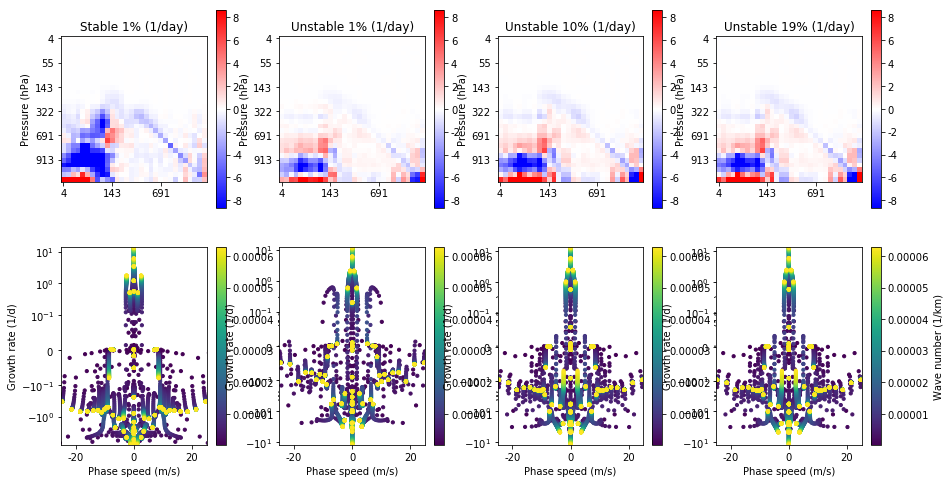

In [44]:
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,8))

toplot_nam = ['MeanLRF_stable','MeanLRF_unstable','MeanLRF_unstable','MeanLRF_unstable']
toplot_ind = [0,0,3,3] # Indices correspond to Perturbation amplitude arrays above
toplot_tit = ['Stable 1% (1/day)','Unstable 1% (1/day)','Unstable 10% (1/day)','Unstable 19% (1/day)']

for i in range(4):
    
    if i==4: d = data; 
    else: d = data2
    
    plt.subplot(2,4,i+1)
    plt.imshow(stday*d['linear_response_functions'][toplot_ind[i]][toplot_nam[i]]['q']['q'],
               cmap='bwr',vmin=vmin,vmax=vmax)
    plt.colorbar()
    plt.title(toplot_tit[i])
    plt.ylabel('Pressure (hPa)')
    plt.draw()
    # Change y labels to pressure
    labels = [item.get_text() for item in plt.gca().get_yticklabels()]
    for ilab,lab in enumerate(labels):
        IND = min(29,max(0,int(float(lab))))
        labels[ilab]=str('%01.0f'%data['base_state']['p'][IND])
    plt.gca().set_yticklabels(labels)
    # Change x labels to pressure
    labels = [item.get_text() for item in plt.gca().get_xticklabels()]
    for ilab,lab in enumerate(labels):
        IND = min(29,max(0,int(float(lab))))
        labels[ilab]=str('%01.0f'%data['base_state']['p'][IND])
    plt.gca().set_xticklabels(labels)
    
for i in range(4):
    
    if i==4: d = data;
    else: d = data2
    
    plt.subplot(2,4,5+i)
    lrf = {'base_state': d['base_state'], 'jacobian': d['linear_response_functions'][toplot_ind[i]][toplot_nam[i]]}
    plot_spectra(lrf)
    plt.xlim([-25, 25])

plt.savefig(pathPDF+'Figure9.pdf',format='pdf')

# Figure 10

This code was converted from Prof. Pritchard MATLAB's script.  

## Load data in .pkl format

In [56]:
S = np.load(pathPKL+'11_6_GR.pkl', allow_pickle=True)

In [57]:
S

{'Growth_rate_daym1': array([9.88396395e-04, 1.18292708e+00, 7.42700666e-01, 1.00781495e+00,
        5.36887376e-01, 9.67970234e-04, 9.34670756e-04, 5.98735924e-01,
        1.98891788e-01, 6.59497704e-02, 1.17230865e-03, 1.08068611e-03,
        1.10645397e-03]),
 'Perturbation_std': array([0.4  , 0.01 , 0.025, 0.05 , 0.1  , 0.25 , 0.5  , 0.1  , 0.13 ,
        0.16 , 0.19 , 0.22 , 0.25 ])}

## Plot figure

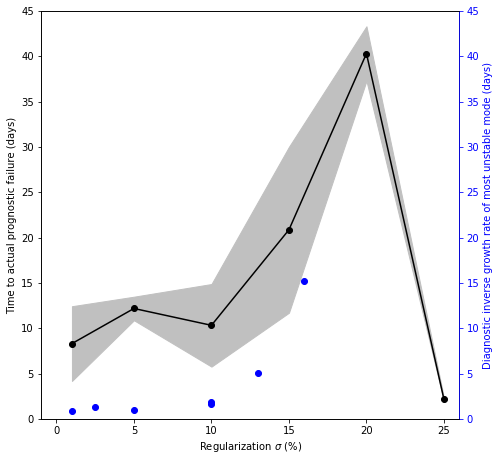

In [68]:
YMAX = 45 # Upper limit for y-axis
Input_reg = np.array([0.01,0.05,0.1,0.15,0.2,0.25])
# Hard-coded table of results from the 4 prognostic tests:
maxstep = np.array([[134,590,446,1499,2044,103], # Orig IC
                  [651,566,332,363,1686,95], # Jan12 IC
                  [512,678,337,840,2011,97], # Jan18 IC
                  [297,504,866,1304,1999,118]]) # Jan24 IC
themean = np.mean(maxstep,axis=0)/48
thestd = np.std(maxstep,axis=0)/48

fig,ax = plt.subplots(figsize=(7.5,7.5))
ax2 = ax.twinx()

# Shading goes in the back
ax.fill_between(100*Input_reg,themean-thestd,themean+thestd,color='silver')
ax.plot(100*Input_reg,themean,color='k')
ax.scatter(100*Input_reg,themean,color='k')
ax.set_ylabel('Time to actual prognostic failure (days)')
ax.set_xlabel ('Regularization $\sigma$ (%)'); 
ax.set_xlim((-1,26))
ax.set_ylim((0,YMAX))

ax2.scatter(100*S['Perturbation_std'],1/S['Growth_rate_daym1'],color='b')
ax2.set_ylim((0,YMAX))
ax2.set_ylabel('Diagnostic inverse growth rate of most unstable mode (days)',color='b')
ax2.spines['right'].set_color('b')
ax2.tick_params(axis='y', colors='b')

plt.savefig(pathPDF+'Figure10.pdf',format='pdf')

Legacy code below

In [9]:
# # Generated with SMOP  0.41
# from libsmop import *
# # pub_instability_ensemble_forsharing (1).m

# clear
# close_('all')
# amts=cellarray(['0.01','0.05','0.1','0.15','0.2','0.25'])
# # pub_instability_ensemble_forsharing (1).m:2

# n=length(amts)
# # pub_instability_ensemble_forsharing (1).m:3
# # load Linear_growth_rates.mat
# figure
# # control ini date
# # Hard-coded table of results from the 4 prognostic tests:
# maxstep[arange(),1]=concat([134,590,446,1499,2044,103])
# # pub_instability_ensemble_forsharing (1).m:8

# maxstep[arange(),2]=concat([651,566,332,363,1686,95])
# # pub_instability_ensemble_forsharing (1).m:9

# maxstep[arange(),3]=concat([512,678,337,840,2011,97])
# # pub_instability_ensemble_forsharing (1).m:10

# maxstep[arange(),4]=concat([297,504,866,1304,1999,118])
# # pub_instability_ensemble_forsharing (1).m:11

# # Attempt at a mean, std figure:
# #addpath('~/Library/matlab_utils')
# hf=makeprintfig(5,5)
# # pub_instability_ensemble_forsharing (1).m:15
# themean=dot(1 / 48,squeeze(nanmean(maxstep.T)))
# # pub_instability_ensemble_forsharing (1).m:16
# thestd=dot(1 / 48,squeeze(nanstd(maxstep.T)))
# # pub_instability_ensemble_forsharing (1).m:17
# for k in arange(1,n).reshape(-1):
#     famt[k]=str2num(amts[k])
# # pub_instability_ensemble_forsharing (1).m:19

# figure
# X=concat([dot(100,famt),dot(100,fliplr(famt))])
# # pub_instability_ensemble_forsharing (1).m:22
# Y=concat([themean + thestd,fliplr(themean - thestd)])
# # pub_instability_ensemble_forsharing (1).m:23
# h=patch(X,Y,'k')
# # pub_instability_ensemble_forsharing (1).m:24
# set(h,'FaceColor',dot(0.8,concat([1,1,1])),'EdgeColor','None')
# hold('on')
# yyaxis('left')
# plot(dot(100,famt),themean,'-o')
# ylim(concat([0,45]))
# ylabel('Time to actual prognostic failure (days)')
# yyaxis('right')
# plot(dot(Perturbation_std,100),1.0 / Growth_rate_daym1,'o')
# ylim(concat([0,45]))
# ylabel('Diagnostic inverse growth rate of most unstable mode (days)')
# xlabel('Regularization \\sigma (%)')
# grid('on')
# #print_(gcf,'-dpdf','pritch_pub_instability_prognostic_v1.pdf')
# plt.savefig(pathPDF+'Figure10.pdf',format='pdf')

NameError: name 'cellarray' is not defined

# Figure S1

Same as Figure 2 but for the unstable network

## Load data

In [20]:
NNname = 'UNSTAB'
path = pathPKL+'9_30_Fig2_'+NNname+'.pkl'
hf = open(path,'rb')
S = pickle.load(hf)

## Plot figure

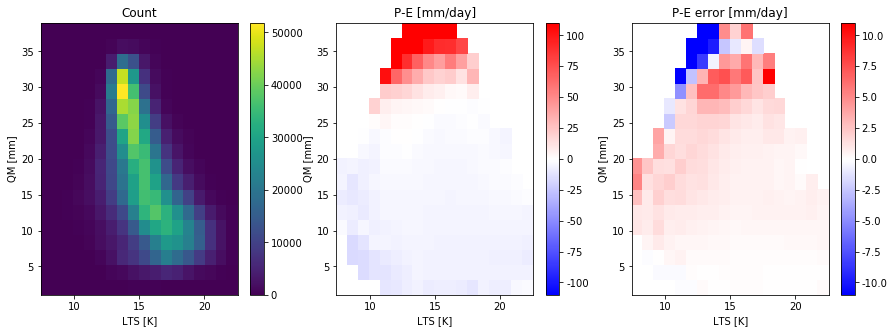

In [21]:
X = 0.5*(S['LTSspace'][:-1]+S['LTSspace'][1:])
Y = 0.5*(S['QMspace'][:-1]+S['QMspace'][1:])

option_array = ['Weights','Precip','Pano']

fig, ax = plt.subplots(1,3,figsize=(15,5))

for i,option in enumerate(option_array):
    
    if option=='Weights': C = S['Whist']; vlim=False; tit='Count'; cmaps = 'viridis'
    elif option=='Precip': C = S['PREChist'][NNname]; vlim=True; vmin = -110; vmax = 110; cmaps = 'bwr'; tit='P-E [mm/day]'
    elif option=='Heating': C = S['HEAThist'][NNname]; vlim=True; vmin = -3.5e3; vmax = 3.5e3; cmaps = 'bwr'; tit='Net heating [W/m2]'
    elif option=='Pano': C = S['PREChist'][NNname]-S['PREChist']['truth']; vlim=True; vmin = -11; vmax = 11; cmaps = 'bwr'; tit='P-E error [mm/day]'
    elif option=='Hano': C = S['HEAThist'][NNname]-S['HEAThist']['truth']; vlim=True; vmin = -70; vmax = 70; cmaps = 'bwr'; tit='Heating error [mm/day]'

    ax0 = ax[i]
    if vlim: im = ax0.pcolormesh(X, Y, C, vmin=vmin, vmax=vmax, cmap=cmaps)
    else: im = ax0.pcolormesh(X, Y, C, cmap=cmaps)

    plt.colorbar(im, ax=ax0)
    ax0.set_xlabel('LTS [K]')
    ax0.set_ylabel('QM [mm]')
    ax0.set_title(tit)
    
plt.savefig(pathPDF+'FigureS1.pdf',format='pdf')

# Figure S2: Same as Figure 9 but without input regularization

In [21]:
# Download appropriate data
!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/8_19_LRF.pkl
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_13_LRF.pkl
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_14_LRF.pkl
#!wget -nc https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/9_20_LRF.pkl

# load
data_old = np.load('8_19_LRF.pkl', allow_pickle=True) 

--2019-11-06 10:45:11--  https://github.com/tbeucler/CBRAIN-CAM/raw/master/notebooks/tbeucler_devlog/PKL_DATA/8_19_LRF.pkl
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tbeucler/CBRAIN-CAM/master/notebooks/tbeucler_devlog/PKL_DATA/8_19_LRF.pkl [following]
--2019-11-06 10:45:12--  https://raw.githubusercontent.com/tbeucler/CBRAIN-CAM/master/notebooks/tbeucler_devlog/PKL_DATA/8_19_LRF.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120084 (117K) [application/octet-stream]
Saving to: ‘8_19_LRF.pkl’

100%[======================================>] 120,084     --.-K/s   in 0.03s   

2019-11-06 10:45:12 (4.12 MB/s) - ‘8_19_LRF.pkl’ saved

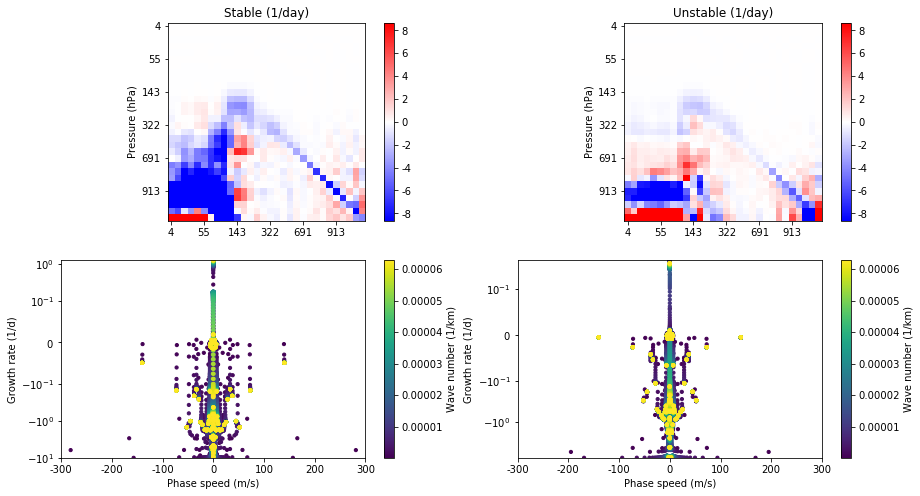

In [34]:
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,8))

toplot_nam = ['MeanLRF_stable','MeanLRF_unstable']
toplot_tit = ['Stable (1/day)','Unstable (1/day)']

for i in range(2):
    
    d = data_old
    
    plt.subplot(2,2,i+1)
    plt.imshow(stday*d['linear_response_functions'][toplot_nam[i]]['q']['q'],
               cmap='bwr',vmin=vmin,vmax=vmax)
    plt.colorbar()
    plt.title(toplot_tit[i])
    plt.ylabel('Pressure (hPa)')
    plt.draw()
    # Change y labels to pressure
    labels = [item.get_text() for item in plt.gca().get_yticklabels()]
    for ilab,lab in enumerate(labels):
        IND = min(29,max(0,int(float(lab))))
        labels[ilab]=str('%01.0f'%d['base_state']['p'][IND])
    plt.gca().set_yticklabels(labels)
    # Change x labels to pressure
    labels = [item.get_text() for item in plt.gca().get_xticklabels()]
    for ilab,lab in enumerate(labels):
        IND = min(29,max(0,int(float(lab))))
        labels[ilab]=str('%01.0f'%d['base_state']['p'][IND])
    plt.gca().set_xticklabels(labels)
    
for i in range(2):
    
    d = data_old
    
    plt.subplot(2,2,3+i)
    lrf = {'base_state': d['base_state'], 'jacobian': d['linear_response_functions'][toplot_nam[i]]}
    plot_spectra(lrf)
    plt.xlim([-300, 300])

plt.savefig(pathPDF+'FigureS2.pdf',format='pdf')

# Figure S3: TODO